In [1]:
import numpy as np
import pandas as pd

path = r"C:\Users\2022\Desktop\test\emails.csv"
df = pd.read_csv(path)
df.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [2]:
df.Text[0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [23]:
df.shape

(5728, 3)

In [3]:
def len_text(text):
    return len(text)

In [4]:
df['len_text'] = df.Text.apply(len_text)

In [5]:
spam_len = df['len_text'][df['Spam']==1]
ham_len  = df['len_text'][df['Spam']==0]

<BarContainer object of 2 artists>

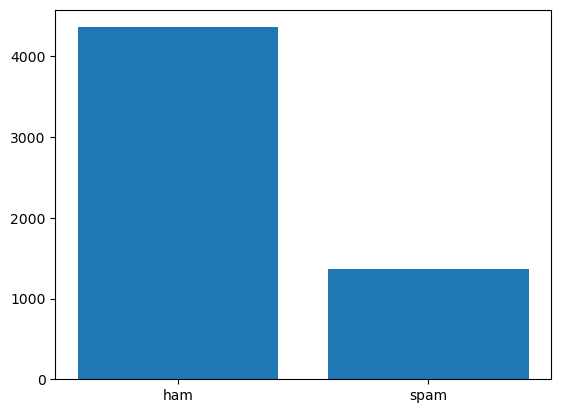

In [6]:
import matplotlib.pyplot as plt
plt.bar(['ham','spam'],[len(ham_len),len(spam_len)])

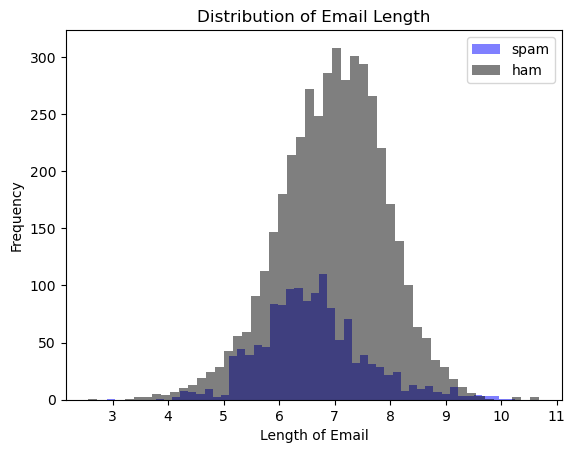

In [14]:
plt.hist(np.log(spam_len), bins=50, alpha=0.5, color='blue', label='spam')
plt.hist(np.log(ham_len), bins=50, alpha=0.5, color='black', label='ham')
plt.xlabel('Length of Email')
plt.ylabel('Frequency')
plt.title('Distribution of Email Length')
plt.legend(loc='upper right')
plt.show()

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocessing(text):
    text  = text.lower()
    text  = [word for word in text.split() if word not in stop_words]
    text  = ' '.join(text)
    return text

In [19]:
df['Text'] = df['Text'].apply(preprocessing)

In [22]:
e_mail = df['Text'].values

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1500)
tfidf = tfidf_vectorizer.fit_transform(e_mail)

In [26]:
X = tfidf.toarray()
Y = df['Spam']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=45)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [31]:
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [34]:
model.score(x_train,y_train)

0.9997817546922741

In [35]:
model.score(x_test,y_test)

0.9860383944153578

In [63]:
txt_test = '''u/aimustafa
Reddit runs on votes
Next to each post and comment you’ll notice little arrows. One arrow points up and one arrow points down. These are buttons that allow you to ‟upvote” or ‟downvote” content. Upvotes show that redditors think content is positively contributing to a community or the site as a whole. Downvotes mean redditors think that content should never see the light of day. If you like something, be it a post or a comment, and you think it contributes to a conversation, upvote it! On Reddit, that’s just considered good manners.
Watch to learn more
All the action is in the comments
Replying to posts and comments is a great way to get a feel for a community and establish yourself before posting. You can format your comment, and even highlight text that contains a spoiler. To reply to someone else’s comment, click or tap ‟reply” under their comment and have at it.
Here are some posts you may like:
r/houseplants
u/Zealousideal-Self722 • 1 month ago
7 Awards
Excited to be almost finished with my cacti shelves, just need to add trim.
11.7k		
244
Share
Award

r/GuiltyDogs
u/mffl1114 • 20 days ago
1 Award
She likes to hide in the bathtub when she’s in trouble		
772		
8
Share
Award

r/DigitalArt
u/Riisiwaanzz • 2 months ago
4 Awards
Committee of Frogs - digital, by me 2022		
1733		
19
Share
Award
Have fun voting and commenting as you explore communities and start contributing. We wish you well as you begin your journey into the weird and wonderful world of Reddit.
 
Cheers,
 
Reddit
P.S. Looking for additional help navigating Reddit? Check 
'''
txt_test = preprocessing(txt_test)
txt_test = tfidf_vectorizer.transform([txt_test]).toarray()

In [64]:
pred_dict = {
    0 : 'Ham',
    1 : 'Spam'
}

In [65]:
pred = model.predict(txt_test)[0]
print(
pred_dict[pred]
)

Spam
